# Combined Cycle Power Plant Data Set

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

(b) Exploring the data:

i. How many rows are in this data set? How many columns? What do the rows and columns represent?

In [2]:
file_path = '../data/CCPP/Folds5x2_pp.xlsx'

df = pd.read_excel(file_path, sheet_name = 'Sheet1')

num_rows, num_columns = df.shape

print(f"There are {num_rows} # of rows")
print(f"There are {num_columns} # of columns")

There are 9568 # of rows
There are 5 # of columns


Response to (b).i : There are 9568 rows of data and 5 columns.  
  
Each row represents hourly measurements of temperature, ambient pressiure, relative humdity, and exhaust vacuum, and net eletricity energy output of the plant.  
Each column represents a feature that matches the aforementioned measurements.  

### (b).ii - Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your ﬁndings.

/Users/daniel/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


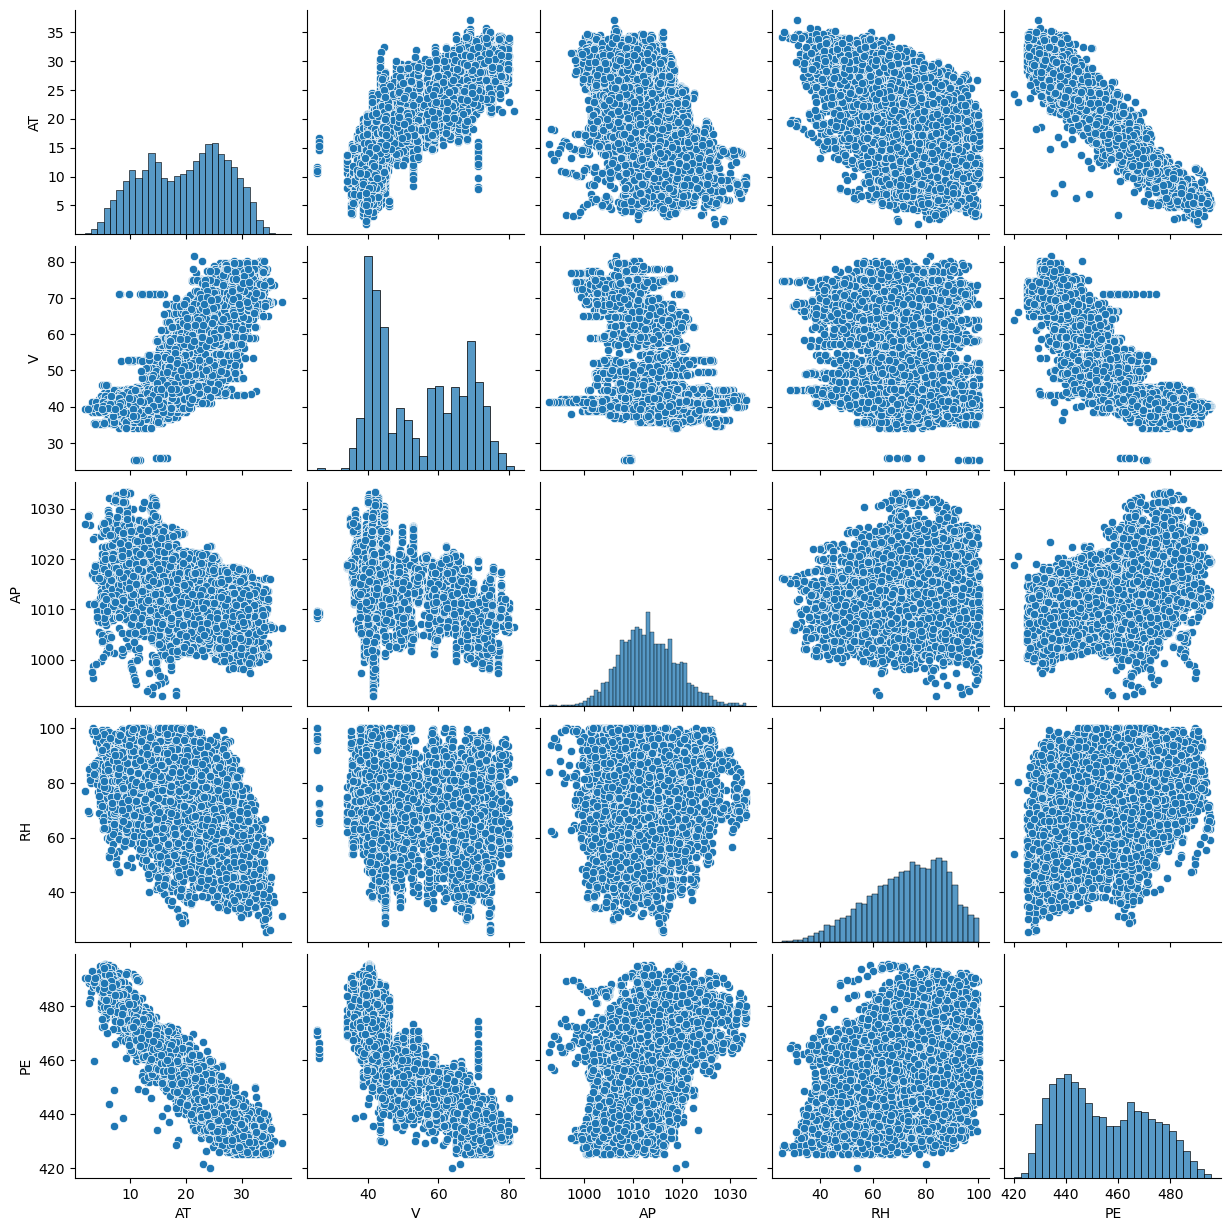

In [3]:
sns.pairplot(df)
plt.show()

Response to (b).ii : Findings: There are a few possible linear correlations: AT vs PE, V vs AT, V vs PE, PE vs AT.

Particularly strong is the linear correlation between AT vs PE (and the reverse relationship), suggesting that as temperature increases, energy output decreases. 

Reviewing the histograms, it appears that AT, V, and PE have most of their values near their endpoints rather than the middle, while AP is normally distributed. PH is negatively skewed.

### iii. What are the mean, the median, range, ﬁrst and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [4]:
features = ['AT', 'V', 'AP', 'RH', 'PE']
columns = ['feature','mean','range','median','Q1','Q3','IQR']

table_df = pd.DataFrame(columns=columns)

for f in features:
    data=df[f]

    mean = np.mean(data)
    data_range = np.max(data) - np.min(data)
    median = np.median(data)
    Q1 = np.percentile(data,25)
    Q3 = np.percentile(data,75)
    IQR = Q3 - Q1

    new_entry = {'feature':f, 'mean':mean,'range':data_range,'median':median,'Q1':Q1,'Q3':Q3,'IQR':IQR}
    new_entry_df = pd.DataFrame([new_entry])
    table_df = pd.concat([table_df, new_entry_df], ignore_index=True)

print(table_df)

  feature         mean  range    median         Q1       Q3      IQR
0      AT    19.651231  35.30    20.345    13.5100    25.72  12.2100
1       V    54.305804  56.20    52.080    41.7400    66.54  24.8000
2      AP  1013.259078  40.41  1012.940  1009.1000  1017.26   8.1600
3      RH    73.308978  74.60    74.975    63.3275    84.83  21.5025
4      PE   454.365009  75.50   451.550   439.7500   468.43  28.6800


### (c) For each predictor, ﬁt a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically signiﬁcant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

Linear Regression Model for AT
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:49:56   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341

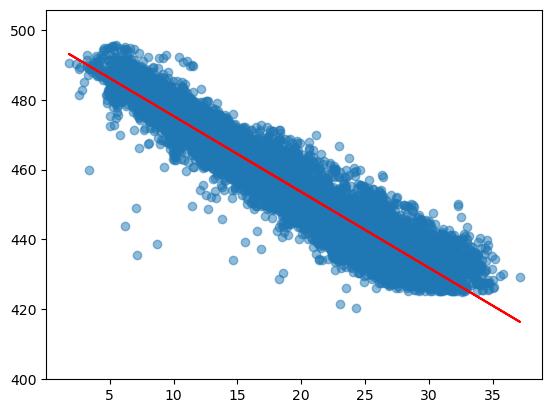

Linear Regression Model for V
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:49:56   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        517.8015 

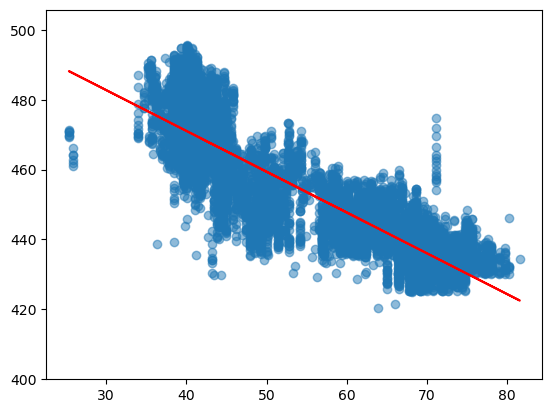

Linear Regression Model for AP
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:49:56   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1055.2610

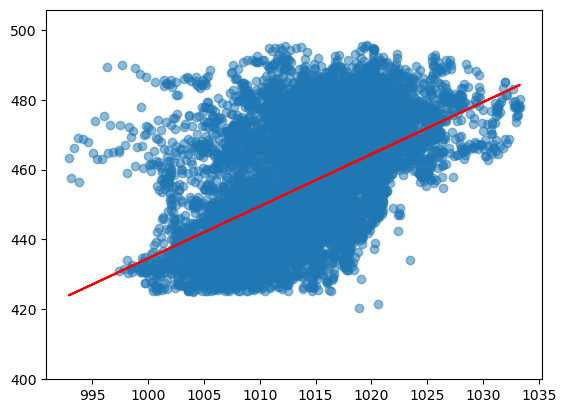

Linear Regression Model for RH
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:49:57   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        420.9618

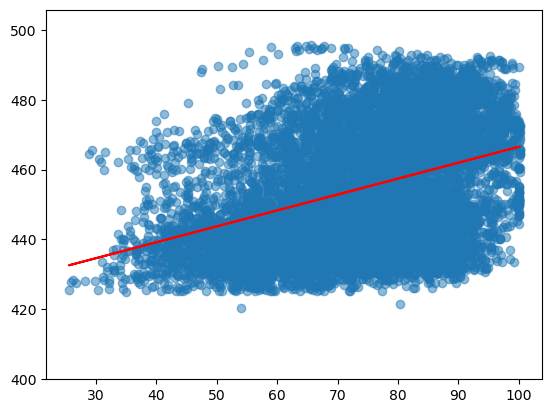

In [5]:
features = ['AT', 'V', 'AP', 'RH']

for f in features:
    X = df[f]
    Y = df['PE']

    X_constant = sm.add_constant(X)

    model = sm.OLS(Y,X_constant).fit()
    summary = model.summary()
    plt.ylim(400, max(Y) + 10) 


    print(f"Linear Regression Model for {f}")
    print(summary)

    plt.scatter(X,Y,alpha=0.5)
    plt.plot(X,model.predict(X_constant),label='Regression line', color = 'red')
    plt.show()


### Response to (c):  

Results of Findings: In all four models, the p-values associated with the coefficients are close to zero. This gives evidence to reject the null hypothesis that the features matrix has no correlation with the target variable (PE).

All of the models show statistically significant relationships between predictor and response.

### Are there any outliers that you would like to remove from your data for each of these regression tasks?

In [6]:
features = ['AT', 'V', 'AP', 'RH', 'PE']
for f in features:
    data = df[f]
    Q1 = np.percentile(data,25)
    Q3 = np.percentile(data,75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[f] < lower_bound) | (df[f] > upper_bound)]

    # Print the outliers
    print(f"Outliers for {f}:")
    # print(outliers[f])
    print(outliers[f].shape[0])

Outliers for AT:
0
Outliers for V:
0
Outliers for AP:
88
Outliers for RH:
12
Outliers for PE:
0


Outliers: For each of the features, I used the IQR method to calculate outliers, there are outliers that should be removed from AP and RH for better models.

### d) Fit a multiple regression model to predict the response using all of the predictors.

Describe your results. For which predictors can we reject the null hypothesis

H 0 : β j = 0?

In [7]:
X = df[['AT', 'V', 'AP', 'RH']]
Y =  df['PE']

X = sm.add_constant(X)

model = sm.OLS(Y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:49:57   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

### Response to d: 
 We can reject the null hypothesis for all predictor variables (AT, V, AP, and RH), they are all statistically significant predictors of the dependent variable PE in this regression model.

### Question (e) 
How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coeﬃcients from 1c on the x-axis, and the multiple regression coeﬃcients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coeﬃcient in a simple linear regression model is shown on the x-axis, and its coeﬃcient estimate in the multiple linear regression model is shown on the y-axis.

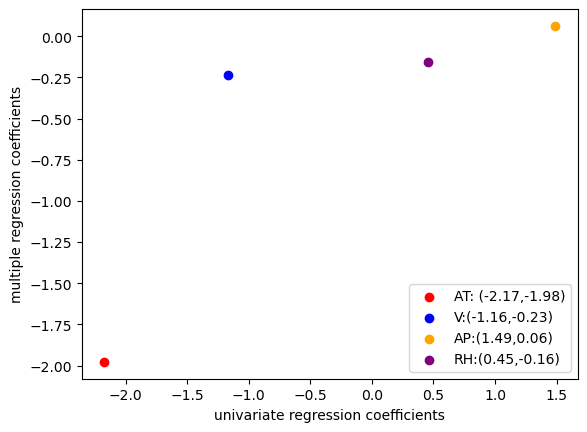

In [8]:
X = [-2.1713, -1.1681, 1.4899, 0.4557]
Y = [-1.9775, -0.2339, 0.0621, -0.1581]

labels = ['AT: (-2.17,-1.98)', 'V:(-1.16,-0.23)', 'AP:(1.49,0.06)', 'RH:(0.45,-0.16)']
colors = ['red', 'blue', 'orange', 'purple']

for x,y,label,color in zip(X,Y,labels,colors):
    plt.scatter(x,y,label=label,color=color)
    
plt.xlabel('univariate regression coeﬃcients')
plt.ylabel('multiple regression coeﬃcients')
plt.legend()

### Response to (e)

The coefficients decreased when going from simple (univariate) linear regression to multiple linear regression. This change occurs because, in multiple linear regression, the model considers the influence of multiple predictors simultaneously, taking into account their interrelationships. As a result, the coefficients for each predictor can be adjusted based on how they interact with other predictors in explaining the variation in the dependent variable.

### (f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, ﬁt a model of the form2

In [9]:
from sklearn.preprocessing import PolynomialFeatures

features = ['AT', 'V', 'AP', 'RH']

degree = 2

for f in features:
    X = df[f].values.reshape(-1, 1)
    Y = df['PE'].values.reshape(-1,1)
    # X_poly = poly_features.fit_transform(X) 
    poly = PolynomialFeatures(degree)
    x_poly = poly.fit_transform(X)
    model = sm.OLS(Y, x_poly).fit()
    print(f"For predictor {f}: [Quadratic Regression Model]")
    print(model.summary(), "\n\n")


degree = 3

for f in features:
    X = df[f].values.reshape(-1, 1)
    Y = df['PE'].values.reshape(-1,1)
    # X_poly = poly_features.fit_transform(X) 
    poly = PolynomialFeatures(degree)
    x_poly = poly.fit_transform(X)
    model = sm.OLS(Y, x_poly).fit()
    
    print(f"For predictor {f}: [Cubic Regression Model]")
    print(model.summary(), "\n\n")


For predictor AT: [Quadratic Regression Model]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 4.674e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:49:57   Log-Likelihood:                -29350.
No. Observations:                9568   AIC:                         5.871e+04
Df Residuals:                    9565   BIC:                         5.873e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

Response to (f):

- The p-values for the features AT, AP, and RH are significantly small, indicating strong evidence to reject the null hypothesis. This suggests a clear presence of a non-linear association between these predictors and the response.

- In contrast, for the predictor V, the p-values for the quadratic term and cubic term are not negligible, with the quadratic term having a notably substantial p-value. Therefore, we cannot reject the null hypothesis, thus there is no non-linear relationship between predictor and response.

### (g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically signiﬁcant.

In [10]:
full_linear_regression_model = 'PE ~ AT + AP + RH + V + AT*V + AP*RH + AT*AP + AT*RH + AT*V + V*AP + V*RH'
model = sm.OLS.from_formula(formula=full_linear_regression_model, data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:49:57   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

### Response to (g): 

Based on a significance level of P = 0.05, the statistically significant interaction terms among the given variables are:

AT:V (p-value < 0.05)  
AT:RH (p-value < 0.05)  
V:AP (p-value < 0.05)   
  
These interaction terms have p-values less than 0.05, indicating that they are statistically significant at the 0.05 significance level. The other interaction terms, including AT:AP, V:RH, and AP:RH, have p-values greater than 0.05 and are not statistically significant at the 0.05 significance level.

### (h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors.

In [11]:
from sklearn.model_selection import train_test_split

X = df[['AT', 'V', 'AP', 'RH']]  # Include all predictors
Y = df['PE']  # Your target variable

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=21)
                                                    
X_train = sm.add_constant(X_train)
base_model = sm.OLS(Y_train,X_train).fit()

print(base_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 2.231e+04
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:49:57   Log-Likelihood:                -19600.
No. Observations:                6697   AIC:                         3.921e+04
Df Residuals:                    6692   BIC:                         3.924e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        456.6598     11.546     39.552      0.0

### Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insigniﬁcant variables using p-values (be careful about interaction terms).

In [12]:
New_X = X_train.copy()

New_X['AT_squared'] = X['AT'] ** 2
New_X['V_squared'] = X['V'] ** 2
New_X['AP_squared'] = X['AP'] ** 2
New_X['RH_squared'] = X['RH'] ** 2

New_X['AT_V'] = X['AT'] * X['V']
New_X['AT_AP'] = X['AT'] * X['AP']
New_X['AT_RH'] = X['AT'] * X['RH']
New_X['V_AP'] = X['V'] * X['AP']
New_X['V_RH'] = X['V'] * X['RH']
New_X['AP_RH'] = X['AP'] * X['RH']

New_X = sm.add_constant(New_X)

new_model = sm.OLS(Y_train,New_X).fit()

while True:
    p_values = new_model.pvalues

    variable_with_highest_p_value = p_values.idxmax()
    highest_p_value = p_values.max()
    
    if highest_p_value > 0.05:
        New_X = New_X.drop(columns=[variable_with_highest_p_value])
        new_model = sm.OLS(Y_train, New_X).fit()
    else:
        break

print(new_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     9445.
Date:                Fri, 22 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:49:57   Log-Likelihood:                -19121.
No. Observations:                6697   AIC:                         3.827e+04
Df Residuals:                    6685   BIC:                         3.835e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6200.8959   1405.526     -4.412      0.0

### Removing insignificant values: 
I used a backward selection while loop to find the highest p_value feature and remove it before retraining the model. My model did not remove any base features. It found V^2, V_AP, and V_RH nsignificant. 

### Test both models on the remaining points and report your train and test MSEs.

In [13]:
from sklearn.metrics import mean_squared_error
X_test = sm.add_constant(X_test)

Y_train_base_predics = base_model.predict(X_train)
# Make predictions on the test data
Y_test_base_predics = base_model.predict(X_test)

# Calculate MSE for the model with interactions on both training and test data
train_mse_base = mean_squared_error(Y_train, Y_train_base_predics)
test_mse_base = mean_squared_error(Y_test, Y_test_base_predics)



X_train_new = X_train.copy()

X_train_new['AT_squared'] = X_train_new['AT'] ** 2
X_train_new['AP_squared'] = X_train_new['AP'] ** 2
X_train_new['RH_squared'] = X_train_new['RH'] ** 2

X_train_new['AT_V'] = X_train_new['AT'] * X_train_new['V']
X_train_new['AT_AP'] = X_train_new['AT'] * X_train_new['AP']
X_train_new['AT_RH'] = X_train_new['AT'] * X_train_new['RH']
X_train_new['AP_RH'] = X_train_new['AP'] * X_train_new['RH']


X_test_new = X_test.copy()

X_test_new['AT_squared'] = X_test_new['AT'] ** 2
X_test_new['AP_squared'] = X_test_new['AP'] ** 2
X_test_new['RH_squared'] = X_test_new['RH'] ** 2

# Calculate interaction terms for X_test_new
X_test_new['AT_V'] = X_test_new['AT'] * X_test_new['V']
X_test_new['AT_AP'] = X_test_new['AT'] * X_test_new['AP']
X_test_new['AT_RH'] = X_test_new['AT'] * X_test_new['RH']
X_test_new['AP_RH'] = X_test_new['AP'] * X_test_new['RH']


Y_train_new_predics = new_model.predict(X_train_new)
# Make predictions on the test data
Y_test_new_predics = new_model.predict(X_test_new)

# Calculate MSE for the model with interactions on both training and test data
train_mse_new = mean_squared_error(Y_train, Y_train_new_predics)
test_mse_new = mean_squared_error(Y_test, Y_test_new_predics)

print(f"Normal regression model")
print(f"Mean Squared Error (MSE) - Training Error: {train_mse_base}")
print(f"Mean Squared Error (MSE) - Test Error: {test_mse_base}")

print(f"Interaction terms + Quadratic nonlinearities regression model")
print(f"Mean Squared Error (MSE) - Training Error: {train_mse_new}")
print(f"Mean Squared Error (MSE) - Test Error: {test_mse_new}")


Normal regression model
Mean Squared Error (MSE) - Training Error: 20.40111469741302
Mean Squared Error (MSE) - Test Error: 21.63373248120182
Interaction terms + Quadratic nonlinearities regression model
Mean Squared Error (MSE) - Training Error: 17.678336454808893
Mean Squared Error (MSE) - Test Error: 19.152183863274843


| Model Description                               | MSE - Training Error | MSE - Test Error   |
|-------------------------------------------------|----------------------|--------------------|
| Normal regression model                          | 20.40                | 21.63              |
| Interaction terms + Quadratic nonlinearities     | 17.68                | 19.15              |
  

### Question 1.(h) Analysis:  
A lower MSE indicates a better-performing model. It signifies that the model's predictions are closer to the actual values, which is the desired outcome in regression analysis.  
  
Thus by introducing interaction terms, quadratic nonlinear terms, and removing insignficant features using backward selection on highest p-value, we were able to reduce the MSE from the base model. 

## (i) KNN Regression:

### i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ { 1, 2, . . . , 100 } that gives you the best ﬁt. Plot the train and test errors in terms of 1/k.

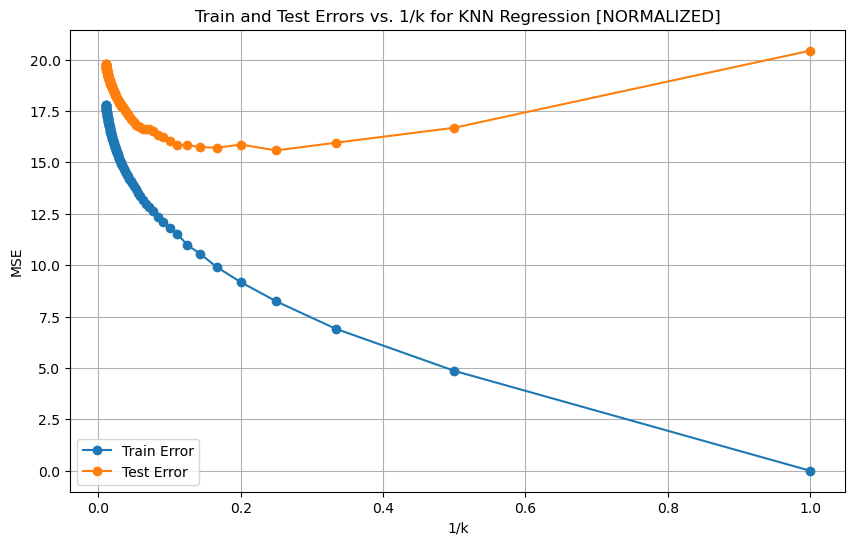

The lowest MSE for Normalized KNN Regression was: 15.579682471264373


In [14]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X = df[['AT', 'V', 'AP', 'RH']]
Y = df['PE']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=21)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


k_values = range(1, 101)
lowest_test_error = 1000
train_errors = []
test_errors = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, Y_train)
    
    y_train_pred = knn.predict(X_train_scaled)
    train_error = mean_squared_error(Y_train, y_train_pred)
    train_errors.append(train_error)

    y_test_pred = knn.predict(X_test_scaled)
    test_error = mean_squared_error(Y_test, y_test_pred)
    if (test_error < lowest_test_error):
        lowest_test_error = test_error
    test_errors.append(test_error)

inverse_k_values = [1 / k for k in k_values]

plt.figure(figsize=(10, 6))
plt.plot(inverse_k_values, train_errors, label='Train Error', marker='o')
plt.plot(inverse_k_values, test_errors, label='Test Error', marker='o')
plt.xlabel('1/k')
plt.ylabel('MSE')
plt.title('Train and Test Errors vs. 1/k for KNN Regression [NORMALIZED]')
plt.legend()
plt.grid(True)
plt.show()

print(f"The lowest MSE for Normalized KNN Regression was: {lowest_test_error}")


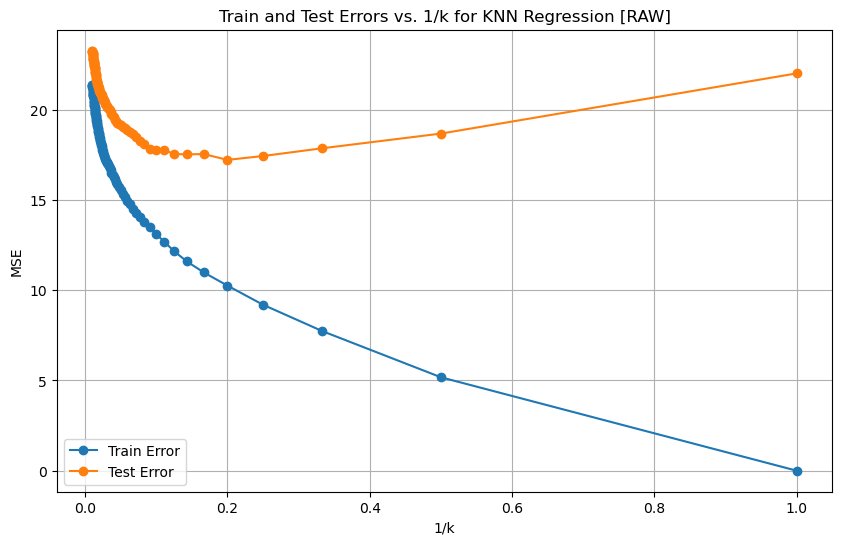

The lowest MSE for Normalized KNN Regression was: 17.212169168930686


In [15]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X = df[['AT', 'V', 'AP', 'RH']]
Y = df['PE']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=21)


k_values = range(1, 101)
train_errors = []
test_errors = []
lowest_test_error = 1000

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, Y_train)
    
    y_train_pred = knn.predict(X_train)
    train_error = mean_squared_error(Y_train, y_train_pred)
    train_errors.append(train_error)


    y_test_pred = knn.predict(X_test)
    test_error = mean_squared_error(Y_test, y_test_pred)
    if test_error < lowest_test_error:
        lowest_test_error = test_error
    test_errors.append(test_error)


import matplotlib.pyplot as plt

inverse_k_values = [1 / k for k in k_values]

plt.figure(figsize=(10, 6))
plt.plot(inverse_k_values, train_errors, label='Train Error', marker='o')
plt.plot(inverse_k_values, test_errors, label='Test Error', marker='o')
plt.xlabel('1/k')
plt.ylabel('MSE')
plt.title('Train and Test Errors vs. 1/k for KNN Regression [RAW]')
plt.legend()
plt.grid(True)
plt.show()
print(f"The lowest MSE for Normalized KNN Regression was: {lowest_test_error}")


### (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

### MSE Comparison for Different Regression Models

- Normalized KNN Regression: 15.58
- Raw KNN Regression: 17.21
- Interaction terms + Quadratic nonlinearities regression model: 19.15

| Model                                          | Test MSE |
| ---------------------------------------------- | -------- |
| Normalized KNN Regression                      | 15.58    |
| Raw KNN Regression                             | 17.21    |
| Interaction terms + Quadratic nonlinearities   | 19.15    |


We see that a normalized KNN Regression has the lowest MSE of 15.58, suggesting that a KNN Regression creates a better fitting model than linear regression since, in general, a lower MSE means that the model's predictions are closer to the actual data points. The data, while linear, could be more dominantly non-linear. 

### 2. ISLR: 2.4.1

For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

(a) The sample size n is extremely large, and the number of predictors p is small.
- With large dataset and a limited number of predictors, an inflexible statistical learning method may encounter underfitting. Thus, opting for a more adaptable model is likely to yield better performance compared to a less flexible one.

(b) The number of predictors p is extremely large, and the number of observations n is small.
- Small dataset and an lots of predictors, a flexible model is susceptible to overfitting. Thus flexible model will perform worse.

(c) The relationship between the predictors and response is highly non-linear.
- An inflexible model can't adjust to complexities of a highly non-linear model. Thus, a flexible model is expected to outperform an inflexible one.

(d) The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.
- A higher variance, thus more noise, leading to possible overfitting in a flexible model.  An inflexible statistical model would be better in this case




### 3. ISLR: 2.4.7

In [16]:
from sklearn.metrics import euclidean_distances
import pandas as pd

X = [[0,3,0], [2,0,0], [0,1,3], [0,1,2], [-1,0,1], [1,1,1]]
testpoint = [[0,0,0]]
result = euclidean_distances(X, testpoint)
pd.DataFrame(result, index=[1,2,3,4,5,6], columns=[f"Euclidian Distance [0,0,0]"])

,"Euclidian Distance [0,0,0]"
1,3.000000
2,2.000000
3,3.162278
4,2.236068
5,1.414214
6,1.732051


(b) What is our prediction with $𝐾=1$ ? Why?
- When K=1, the algorithm looks for the single closest observation in the training dataset to the test point, and the prediction is based on the label (or value in the case of regression) of that single nearest neighbor. So, if observation number 5 is the closest to the test point then the prediction for Y would be green.

(c) What is our prediction with $K = 3$? Why?
 - When K=3, the algorithm looks for the three closest observations in the training dataset to the test point. 2, 5, and 6 as the closest neighbors. Based on the labels of these three neighbors, they are 3 Green and 1 Red.


(d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?
- If the Bayes decision boundary in the problem is highly non-linear, it would be more likely to expect the best value for K to be small. More flexible and better at capturing complex patterns.